In [1]:
#For Dataframe & array processing
import numpy as np
import pandas as pd

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Suppres warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read the dataset in dataframe
df_bike = pd.read_csv('day.csv')

In [3]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
## checking for null values & data types
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Deleting following variables from the DF
    # instant - this is id field
    # dteday - redundant information as the same data is available in other columns
    # casual & registered - their sum contibute to the target variable
    # temp -  Temp is similar to atemp - they are highly correlated
del df_bike['instant']
del df_bike['dteday']
del df_bike['casual']
del df_bike['registered']
del df_bike['temp']

In [6]:
# Encoding/mapping the season column
df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the month column
df_bike.mnth = df_bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the weekday column
df_bike.weekday = df_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Encoding/mapping the weathersit column
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [7]:
# Checking data after mapping the columns to actual meaningful values
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


In [8]:
# Creating dummies variables & dropping the column which is redundant ie: of n values keeping n-1 columns for each category
months_df=pd.get_dummies(df_bike.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df_bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df_bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df_bike.season,drop_first=True)

In [9]:
# Merging the dataframes
df_bike=pd.concat([df_bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

# Visualization of the predictors against the target variable

### Categorical Vs Target

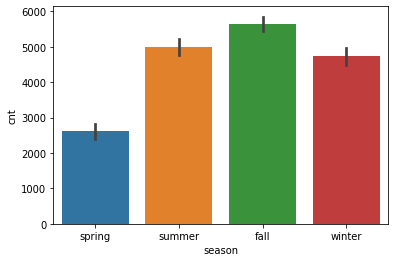

In [10]:
# Season vs cnt
sns.barplot(x='season',y='cnt',data=df_bike)
plt.show()

In [11]:
# ==> the count is largest in fall when whether is good.

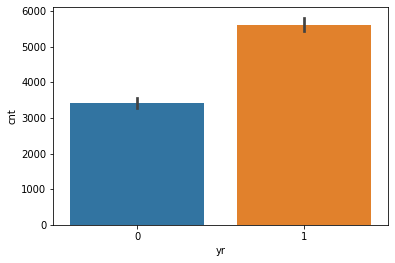

In [12]:
# Year vs cnt
sns.barplot(x='yr',y='cnt',data=df_bike)
plt.show()

In [13]:
#### ==> Count has increased in 2019 in comparison to 2018

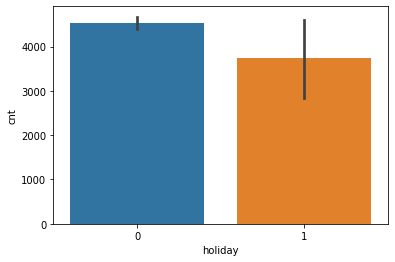

In [14]:
# Holiday vs cnt
sns.barplot(x='holiday',y='cnt',data=df_bike)
plt.show()

In [15]:
## ==> if it is not a holiday people travel more to work & thus demand is high

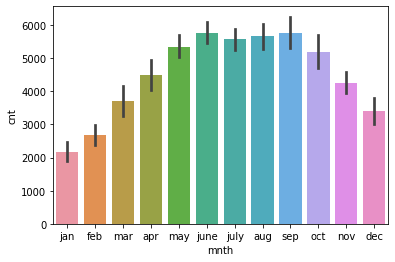

In [16]:
# Month vs Cnt
sns.barplot(x='mnth',y='cnt',data=df_bike)
plt.show()

In [17]:
## ==> It is more starting from June to sep when fall season is present

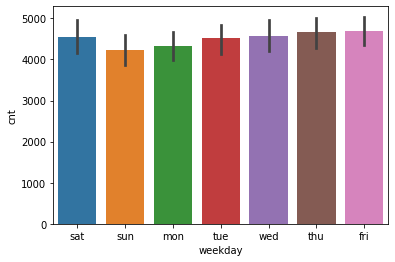

In [18]:
# Weekday vs Cnt
sns.barplot(x='weekday',y='cnt',data=df_bike)
plt.show()

In [19]:
## ==>This is least on sunday when offices are closed on weekends. Other days is comparitevly the same

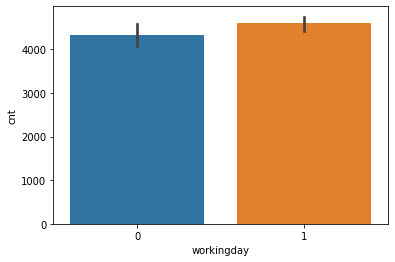

In [20]:
# Workingday vs Cnt
sns.barplot(x='workingday',y='cnt',data=df_bike)
plt.show()

In [21]:
## ==>If it is a working day then the demand is more

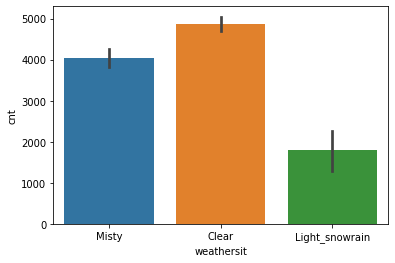

In [22]:
## Weathersit vs Cnt
sns.barplot(x='weathersit',y='cnt',data=df_bike)
plt.show()

In [23]:
## ==>When weather is clear then it is highly in demand

### Numerical vs Target

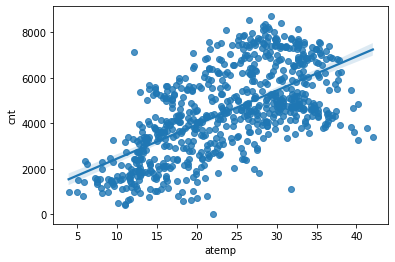

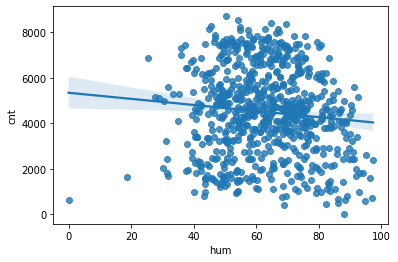

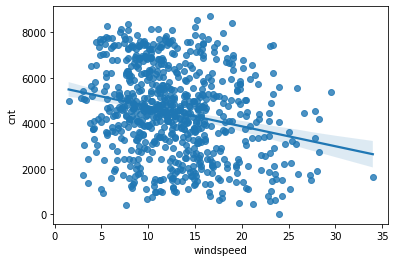

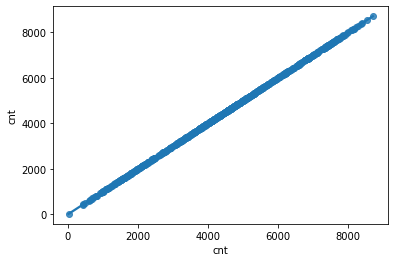

In [24]:
num_var = ['atemp','hum','windspeed','cnt']
for i in num_var:
    sns.regplot(x=i,y='cnt',data=df_bike)
    plt.show()

In [25]:
## ==> with temp it seems to be good linear relationship in comparison to other numerical cols

### Bivariate analysis

In [26]:
def bi_cols(col_name):
    sns.barplot(x=col_name,y='cnt',data=df_bike, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

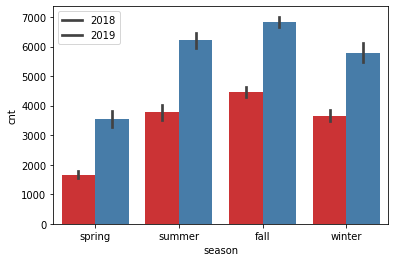

In [27]:
bi_cols('season')

In [28]:
## More demand is in fall season for both 2018 & 2019

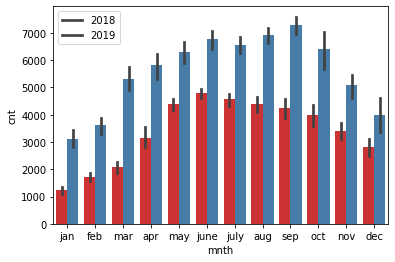

In [29]:
bi_cols('mnth')

In [30]:
## For June 2018 & Sep 2019, shows the highest demand

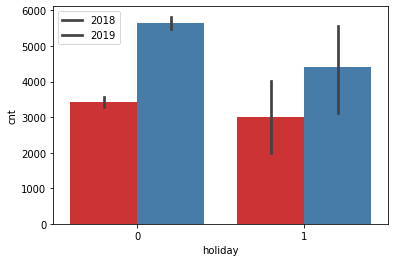

In [31]:
bi_cols('holiday')

In [32]:
## When its not a holiday the demand is high in both the years but it can be seen clearly that 
## due to covid the demand has gone down in terms of holiday/working day due to WFH may be.

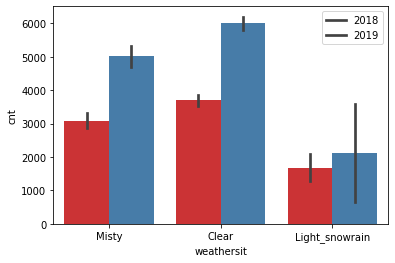

In [33]:
bi_cols('weathersit')

In [34]:
## => For both the years, clear weather is when the bike is in popular demand

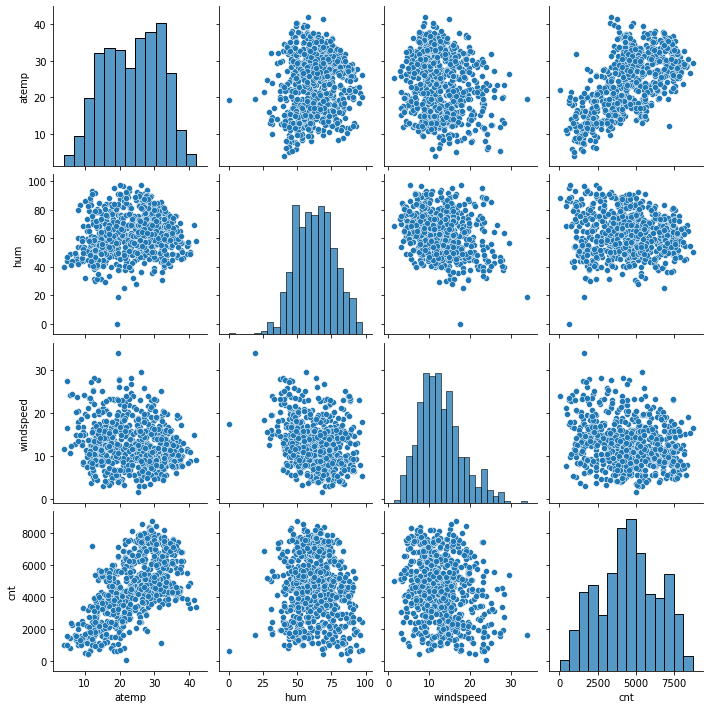

In [35]:
#df_bike.columns
num_var=['atemp','hum','windspeed','cnt']
sns.pairplot(df_bike[num_var])
plt.show()

### Multivariate Analysis

In [36]:
df_bike[num_var].corr()

,atemp,hum,windspeed,cnt
atemp,1.000000,0.141512,-0.183876,0.630685
hum,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.630685,-0.098543,-0.235132,1.000000


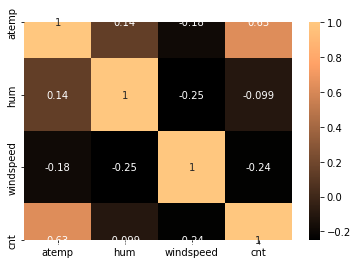

In [37]:
sns.heatmap(df_bike[num_var].corr(),annot=True,cmap='copper')
plt.show()

In [38]:
## ==> Highest correlation is between atemp & cnt.

### 1. Data Preparation

In [39]:
# dropping unnecessary columns as we have already created dummy variable out of it.
df_bike.drop(['season','mnth','weathersit','weekday'], axis=1, inplace=True)

### 2.Splitting the data to train & test set

In [40]:
#For train & test data
from sklearn.model_selection import train_test_split


#We specify this so that the train and test data set always have the same rows, respectively. Training at 70% & test at 30%
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### 3.Scaling the data

In [41]:
#For scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['windspeed', 'hum', 'atemp','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
#  Putting the target variable in y_train
y_train = df_train.pop('cnt')
# Putting all predictors in X_train
X_train = df_train

In [43]:
#Checking the columns available to start building the model
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

### 4. Building the model

In [44]:
# For building the model & calculating VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
## MODEL-0
# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr.summary())

# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          4.12e-180
Time:                        19:19:15   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2617      0.035      7.

,Features,VIF
20,sun,inf
2,holiday,inf
3,workingday,inf
19,sat,inf
26,spring,10.74
28,winter,9.47
27,summer,8.23
15,nov,6.77
16,oct,6.59
7,aug,6.24


In [46]:
# MODEL-1
#Removing Oct due to high p-value

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter']])



# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr1.summary())

# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          4.05e-181
Time:                        19:19:15   Log-Likelihood:                 523.82
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     483   BIC:                            -879.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2643      0.033      8.

,Features,VIF
2,holiday,inf
3,workingday,inf
19,sun,inf
18,sat,inf
25,spring,10.74
27,winter,7.21
26,summer,6.76
4,atemp,5.94
7,aug,4.70
10,jan,4.29


In [47]:
# MODEL-2
#Removing holiday due to high VIF & P-value

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter']])



# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr2.summary())

# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          4.05e-181
Time:                        19:19:15   Log-Likelihood:                 523.82
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     483   BIC:                            -879.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2865      0.049      5.

,Features,VIF
0,const,153.72
24,spring,10.74
2,workingday,10.04
17,sat,7.70
18,sun,7.25
26,winter,7.21
25,summer,6.76
3,atemp,5.94
6,aug,4.70
9,jan,4.29


In [48]:
#Removing workingday due to high VIF 

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter']])



# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr3.summary())

# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.00e-180
Time:                        19:19:15   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     484   BIC:                            -876.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3651      0.041      8.

,Features,VIF
0,const,108.86
23,spring,10.73
25,winter,7.20
24,summer,6.76
2,atemp,5.93
5,aug,4.69
8,jan,4.29
9,july,4.27
7,feb,3.20
14,sep,2.99


In [49]:
# MODEL-4
#Removing mar,july,sat,wed,thu,tue & finally june due to high P-value
## The aforementioned columns are removed one after another & in each iteration the R2, adj R2, VIF & F-stats were observed
## to have increased by some margin

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'may', 'nov', 'sep',
       'mon', 'sun', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter']])



# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr4.summary())

# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.52e-186
Time:                        19:19:16   Log-Likelihood:                 516.42
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     491   BIC:                            -914.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3457      0.037      9.

,Features,VIF
0,const,88.88
16,spring,6.04
2,atemp,4.32
18,winter,4.10
17,summer,3.80
8,jan,2.35
3,hum,1.98
7,feb,1.85
10,nov,1.77
5,aug,1.70


In [50]:
#MODEL-5
#Removing spring & may due to high P-value

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'nov', 'sep',
       'mon', 'sun', 'Light_snowrain', 'Misty', 'summer', 'winter']])



# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr5.summary())

# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.02e-187
Time:                        19:19:16   Log-Likelihood:                 513.17
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     493   BIC:                            -920.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2982      0.031      9.

,Features,VIF
0,const,62.01
2,atemp,2.84
16,winter,2.35
8,jan,2.25
3,hum,1.92
15,summer,1.82
9,nov,1.74
7,feb,1.71
6,dec,1.63
14,Misty,1.57


In [71]:
#MODEL-6
#Removing MON, FEB, DEC, NOV, JAN due to reduce the complexity of the model 
#The aforementioned columns were removed one after another & no significant impact was observed on R2, adj R2, VIF & F-stats

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr', 'atemp', 'hum', 'windspeed', 'sep', 'Light_snowrain', 'Misty', 'summer', 'winter']])



# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr6.summary())

# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.35e-183
Time:                        19:23:09   Log-Likelihood:                 484.57
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     500   BIC:                            -906.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2188      0.028      7.

,Features,VIF
0,const,45.06
3,hum,1.87
7,Misty,1.55
2,atemp,1.28
9,winter,1.24
6,Light_snowrain,1.23
8,summer,1.20
4,windspeed,1.19
5,sep,1.11
1,yr,1.03


In [52]:
# Predicting using the model 6
y_train_pred = lr6.predict(X_train_lm)
y_train_pred

653    0.728970
576    0.738740
426    0.507308
728    0.368360
482    0.598988
         ...   
526    0.776915
578    0.795342
53     0.254514
350    0.257815
79     0.290528
Length: 510, dtype: float64

In [53]:
#Calculating R^2
from sklearn.metrics import r2_score
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8260933415099185

In [54]:
# Checking the parameters and their coefficient values
lr6.params

const             0.218832
yr                0.230224
atemp             0.606150
hum              -0.178721
windspeed        -0.170595
sep               0.104554
Light_snowrain   -0.224918
Misty            -0.049858
summer            0.084658
winter            0.130293
dtype: float64

###  5. Residual analysis

Text(0.5, 0, 'Errors')

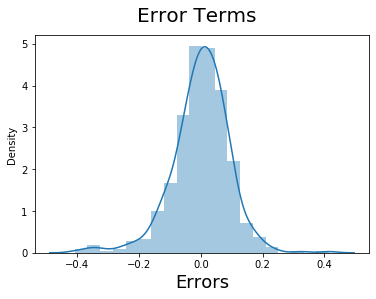

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [56]:
## ==> The histogram shows the residual having mean at 0 & normally distributed

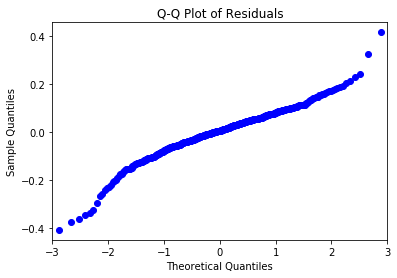

In [57]:
## QQ-plot
sm.qqplot((y_train - y_train_pred))
plt.title('Q-Q Plot of Residuals')
plt.show()

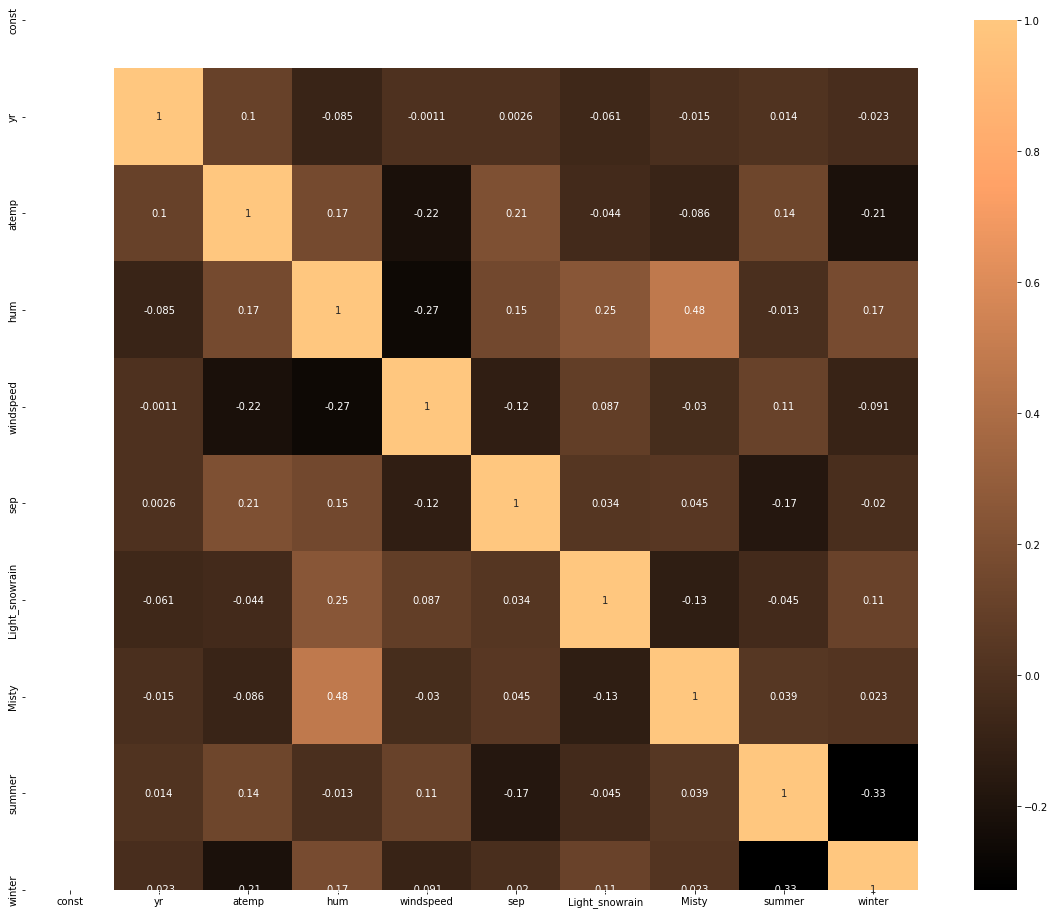

In [58]:
plt.figure(figsize=(20,16))
sns.heatmap(X_train_lm.corr(),annot=True,cmap='copper')

In [59]:
## VIF is low & also No multicollinearity between the predictors

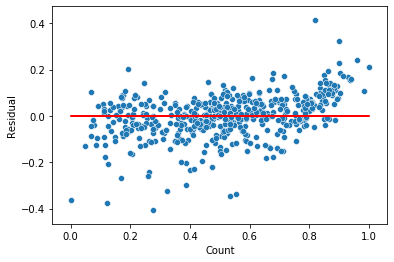

In [60]:
#Homosedacity
y_train_pred = lr6.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [61]:
## No visible pattern observed from above plot for residuals.

### 6. Making Predictions Using the Final Model

In [62]:
num_vars = ['windspeed', 'hum', 'atemp','cnt']
## Scaling the test data
# note: only performing the transform & not fit. Since fit is already completed in train dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
#X_train_lm.columns

In [64]:
# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test[['yr', 'atemp', 'hum', 'windspeed', 'sep', 'Light_snowrain', 'Misty', 'summer', 'winter']])

# Making predictions using the model

y_test_pred = lr6.predict(X_test_m1)

In [65]:
## Calculating R^2 on test set
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8041

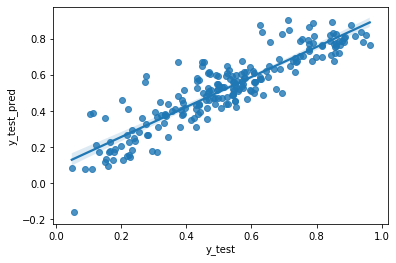

In [66]:
sns.regplot(x=y_test,y=y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [67]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7753


# Conclusion

## Comparision between Training and Testing dataset:
##- Train dataset R^2          : 0.826
##- Test dataset R^2           : 0.804
##- Train dataset Adjusted R^2 : 0.823    
##- Test dataset Adjusted R^2  : 0.775
##Demand of bikes depend on year, humidity, temp, windspeed, sep, Light_snowrain, Misty, summer and winter.

In [68]:
X_train_lm.columns

Index(['const', 'yr', 'atemp', 'hum', 'windspeed', 'sep', 'Light_snowrain',
       'Misty', 'summer', 'winter'],
      dtype='object')

In [69]:
lr6.params

const             0.218832
yr                0.230224
atemp             0.606150
hum              -0.178721
windspeed        -0.170595
sep               0.104554
Light_snowrain   -0.224918
Misty            -0.049858
summer            0.084658
winter            0.130293
dtype: float64

### Equation of line is:
#### CNT = 0.226 + 0.229*yr + atemp*0.566 - hum*0.181 -windspeed*0.167  + sep*0.124 - Light_snowrain*0.223 -misty*0.0529 + summer*0.102 + winter*0.141